Electromagnetic contribution to CSV in PDF 
https://arxiv.org/pdf/1512.04139.pdf

In [1]:
import math
import matplotlib.pyplot as plt

import numpy as np
import scipy.integrate as integrate
from scipy.integrate import quad,dblquad
from scipy import integrate

In [2]:
#Quark distribution functions by GRV
#Delta = db-ub,T = ub+db
#x = np.linspace(0.2,0.7,50)
x = np.arange(0.01,0.99,0.01)
xuv_LO = 1.239*x**0.48*(1-x)**2.72
xdv_LO = 0.614*(1-x)**0.9*xuv_LO
xDelta_LO = 0.23*x**0.48*(1-x)**11.3*(1-12*x**0.5+50.9*x)
xT_LO = 1.52*x**0.15*(1-x)**9.1*(1-3.6*x**0.5+7.8*x)
xg_LO = 17.47*x**1.6*(1-x)**3.8
#xs_LO = xsb_LO = 0
#the corresponding NLO input at Q2 = 0.4
xuv_NLO = 0.632*x**0.43*(1-x)**3.09*(1+18.2*x)
xdv_NLO = 0.624*(1-x)**1*xuv_NLO
xDelta_NLO = 0.2*x**0.43*(1-x)**12.4*(1-13.3*x**0.5+60.0*x)
xT_NLO = 1.24*x**0.2*(1-x)**8.5*(1-2.3*x**0.5+5.7*x)
xg_NLO = 20.80*x**1.6*(1-x)**4.1
#xs_NLO = xsb_NLO = 0

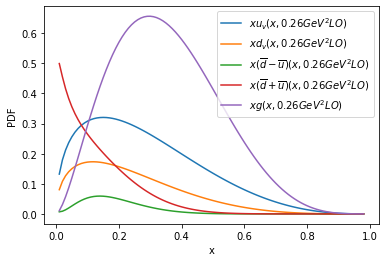

In [3]:
plt.plot(x,xuv_LO,label = r'$xu_v(x,0.26 GeV^2LO)$')
plt.plot(x,xdv_LO,label = r'$xd_v(x,0.26 GeV^2LO)$')
plt.plot(x,xDelta_LO,label = r'$x(\overline{d}-\overline{u})(x,0.26 GeV^2LO)$')
plt.plot(x,xT_LO,label = r'$x(\overline{d}+\overline{u})(x,0.26 GeV^2LO)$')
plt.plot(x,xg_LO,label = r'$xg(x,0.26 GeV^2LO)$')
plt.xlabel('x')
plt.ylabel('PDF')
plt.legend()

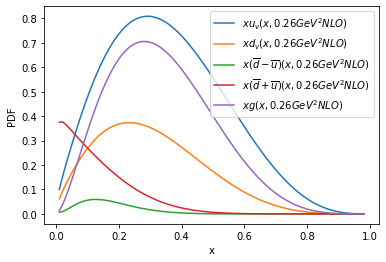

In [4]:
plt.plot(x,xuv_NLO,label = r'$xu_v(x,0.26 GeV^2NLO)$')
plt.plot(x,xdv_NLO,label = r'$xd_v(x,0.26 GeV^2NLO)$')
plt.plot(x,xDelta_NLO,label = r'$x(\overline{d}-\overline{u})(x,0.26 GeV^2NLO)$')
plt.plot(x,xT_NLO,label = r'$x(\overline{d}+\overline{u})(x,0.26 GeV^2NLO)$')
plt.plot(x,xg_NLO,label = r'$xg(x,0.26 GeV^2NLO)$')
plt.xlabel('x')
plt.ylabel('PDF')
plt.legend()

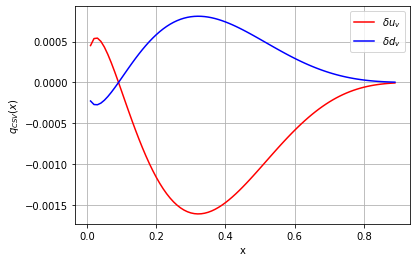

In [26]:
def delta_udv(parameter):
    x = np.arange(0.01,0.9,0.01)
    return x*parameter*(1-x)**4*x**-0.5*(x-0.0909)
    #return parameter*(1-x)**4*x**-0.5*(x-0.0909)


x_axis = np.arange(0.01,0.9,0.01)
y_delta_uv = delta_udv(-0.058)
plt.plot(x_axis,y_delta_uv,'r',label=r'$\delta u_v$')
y_delta_dv = delta_udv(0.0292)
plt.plot(x_axis,y_delta_dv,'b',label=r'$\delta d_v$')

#plt.xlim(0.2,0.7)
#plt.ylim(-0.01,0.01)
plt.xlabel("x")
plt.ylabel(r'$q_{CSV}(x)$')
plt.legend()
plt.grid()
plt.savefig('notebook_results/CSV_xdv_xuv.pdf')


In [6]:
#radiative QED effects, DGLAP evolution
Q02 = 0.26
mp = 0.938272088
def bounds_x():
    return [0,1]
def bounds_qt2(x):
    #return [0,Q02]
    return [0,(1-x)*Q02-x**2*mp**2]
def integrand(qt2,x):
    
    Q2 = (qt2+x**2*mp**2)/(1-x)
    GE = 1/(1+Q2/0.71)**2
    GM = GE*2.793
    F1 = (4*mp**2*GE+Q2*GM)/(Q2+4*mp**2)
    alpha = 1/137
    #formula = (x-1)*((x-1)*t-x**2*mp**2)/(t**2*(x-1)**2)*F1**2
    formula = qt2/(qt2+x**2*mp**2)**2*F1**2
    coefficient = alpha/(2*math.pi)*(1+(1-x)**2)/x
    return x*coefficient*formula



I = integrate.nquad(integrand,[bounds_qt2,bounds_x])
print(I)

/opt/homebrew/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/opt/homebrew/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


(0.007406831535995553, 111.18128370653565)


/opt/homebrew/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


In [7]:
#radiative QED effects, DGLAP evolution
Q02 = 0.26
mp = 0.938272088
def bounds_x():
    return [0,1]
def bounds_Q2(x):
    return [x**2*mp**2/(1-x),Q02]
    #return [0,(x-1)*Q02-x**2*mp**2]
def integrand(Q2,x):
    GE = 1/(1+Q2/0.71)**2
    GM = GE*2.793
    F1 = (4*mp**2*GE+Q2*GM)/(Q2+4*mp**2)
    alpha = 1/137
    #formula = (x-1)*((x-1)*t-x**2*mp**2)/(t**2*(x-1)**2)*F1**2
    formula = ((1-x)*Q2-x**2*mp**2)/((1-x)*Q2**2)*F1**2
    coefficient = alpha/(2*math.pi)*(1+(1-x)**2)/x
    return x*coefficient*formula



I = integrate.nquad(integrand,[bounds_Q2,bounds_x])
print(I)

(0.007406831535996894, 111.18128370304544)


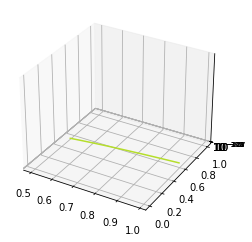

In [8]:
x = np.linspace(0.01,0.99,100)
Q2 = np.linspace(0.5,0.99,100)

X,Y = np.meshgrid(Q2,x)
Z = integrand(X,Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X,Y,Z)
ax.set_zscale('log')

In [9]:
integrand(0.9,0.9)

-0.0006360085988978815

Just from the screen shot

In [10]:
import pandas as pd
df_lattice_xddv = pd.read_csv("CSV_Lattice_xddv.txt",sep = " ",header = None)
df_lattice_xddv.columns = ["x","xddv","nan"]
#df_lattice_xddv.describe()
df_lattice_xddv.head()

,x,xddv,nan
0,0.004327,-0.000628,NaN
1,0.011019,-0.001278,NaN
2,0.023059,-0.001463,NaN
3,0.040447,-0.001181,NaN
4,0.057916,-0.000666,NaN


In [11]:
df_lattice_xduv = pd.read_csv("CSV_Lattice_xduv.txt",sep = " ",header = None)
df_lattice_xduv.columns = ["x","xduv","nan"]
#df_lattice_xduv.describe()
df_lattice_xduv.head()

,x,xduv,nan
0,0.015458,0.001977,NaN
1,0.026351,0.002816,NaN
2,0.033260,0.002863,NaN
3,0.040042,0.002725,NaN
4,0.053413,0.002169,NaN


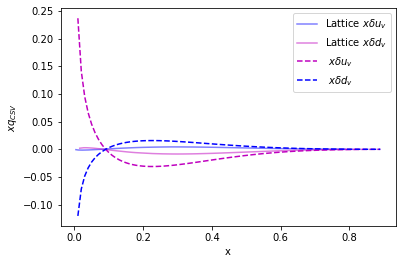

In [12]:
x_xddv = df_lattice_xddv['x']
xddv_xddv = df_lattice_xddv['xddv']
plt.plot(x_xddv,xddv_xddv,color = 'b',alpha = 0.5,label = r'Lattice $x\delta u_v$')
x_xduv = df_lattice_xduv['x']
xduv_xduv = df_lattice_xduv['xduv']
plt.plot(x_xduv,xduv_xduv,color = 'm',alpha = 0.5,label = r'Lattice $x\delta d_v$')
plt.xlabel('x')
plt.ylabel(r'$xq_{CSV}$')

x_axis = np.arange(0.01,0.9,0.01)
y_delta_uv = delta_udv(-0.305)
plt.plot(x_axis,y_delta_uv,'--',color = 'm',label=r' $x\delta u_v$')
y_delta_dv = delta_udv(0.155)
plt.plot(x_axis,y_delta_dv,'--',color = 'b',label=r' $x\delta d_v$')
plt.legend()

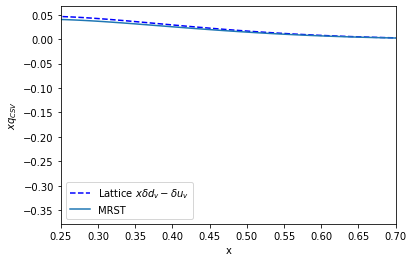

In [13]:
plt.plot(x_axis,y_delta_dv-y_delta_uv,'--',color = 'b',label=r'Lattice $x\delta d_v-\delta u_v$')
plt.xlim(0.25,0.7)
MRST_delta_uv = delta_udv(-0.2)
MRST_delta_dv = delta_udv(0.2)
plt.plot(x_axis,MRST_delta_dv-MRST_delta_uv,label = r'MRST')
plt.xlabel('x')
plt.ylabel(r'$xq_{CSV}$')
plt.legend()

number from the paper for 1GeV

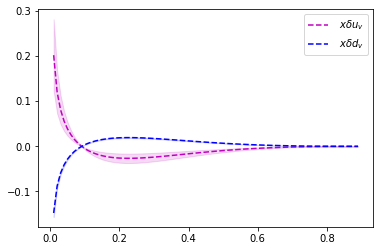

In [14]:
y1_delta_uv = delta_udv(-0.26)#-0.26(8),90% is 1.28, 1.28*0.08 = 0.1024 
y1_delta_uv_low = delta_udv(-0.3624)
y1_delta_uv_high = delta_udv(-0.1576)
y1_delta_dv = delta_udv(0.19)#0.19(4), 1.28*0.04=0.0112
y1_delta_dv_low = delta_udv(0.2012)
y1_delta_dv_high = delta_udv(0.1788)
plt.plot(x_axis,y1_delta_uv,'--',color = 'm',label=r' $x\delta u_v$')
plt.fill_between(x_axis,y1_delta_uv_low,y1_delta_uv_high,color = 'm',alpha = 0.15)
plt.plot(x_axis,y1_delta_dv,'--',color = 'b',label=r' $x\delta d_v$')
plt.fill_between(x_axis,y1_delta_dv_low,y1_delta_dv_high,color = 'b',alpha = 0.15)
plt.legend()

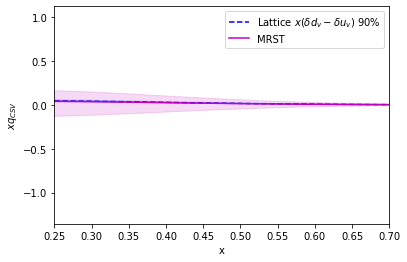

In [15]:
#CSV = ddv-duv, 0.19(4)+0.26(8) = 0.45(9),0.09*1.28 = 0.1152,0.5652&0.3348
plt.plot(x_axis,y1_delta_dv-y1_delta_uv,'--',color = 'b',label=r'Lattice $x(\delta d_v-\delta u_v)$ 90%')
y1_CSV_low = delta_udv(0.3348)
y1_CSV_high = delta_udv(0.5652)
plt.fill_between(x_axis,y1_CSV_low,y1_CSV_high,color = 'b',alpha = 0.15)
plt.xlim(0.25,0.7)
plt.xlabel('x')
plt.ylabel(r'$xq_{CSV}$')
#plt.legend()


y_delta_uv = delta_udv(-0.2)
y_delta_dv = delta_udv(0.2)
plt.plot(x_axis,y_delta_dv-y_delta_uv,color = 'm',label = 'MRST')
y_delta_uv_up = delta_udv(0.8)
y_delta_uv_low = delta_udv(-0.8)
y_delta_dv_up = delta_udv(-0.65)
y_delta_dv_low = delta_udv(0.65)
#plt.plot(x_axis,y_delta_dv-y_delta_uv,label = 'xCSV')
#plt.plot(x_axis,y_delta_uv_up-y_delta_uv_low,'-.')
#plt.plot(x_axis,y_delta_dv_up-y_delta_dv_low,'--')
plt.fill_between(x_axis,y_delta_uv_up-y_delta_uv_low,y_delta_dv_up-y_delta_dv_low,color = 'm',alpha = 0.15)
plt.legend()
#plt.plot(x_axis,y_delta_dv-y_delta_uv,color = 'm',label = 'MRST')
plt.savefig('CSV_MRST_Lattice.pdf')


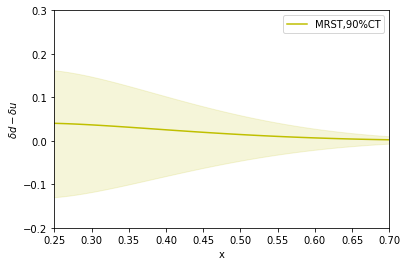

In [18]:
y_delta_uv = delta_udv(-0.2)
y_delta_dv = delta_udv(0.2)
plt.plot(x_axis,y_delta_dv-y_delta_uv,color = 'y',label = 'MRST,90%CT')
y_delta_uv_up = delta_udv(0.8)
y_delta_uv_low = delta_udv(-0.8)
y_delta_dv_up = delta_udv(-0.65)
y_delta_dv_low = delta_udv(0.65)
#plt.plot(x_axis,y_delta_dv-y_delta_uv,label = 'xCSV')
#plt.plot(x_axis,y_delta_uv_up-y_delta_uv_low,'-.')
#plt.plot(x_axis,y_delta_dv_up-y_delta_dv_low,'--')
plt.fill_between(x_axis,y_delta_uv_up-y_delta_uv_low,y_delta_dv_up-y_delta_dv_low,color = 'y',alpha = 0.15)
plt.legend()
plt.xlim(0.25,0.7)
plt.ylim(-0.2,0.3)
plt.xlabel('x')
plt.ylabel(r'$\delta d-\delta u$')
plt.savefig('notebook_results/CSV_MRST.pdf')